#**Machine Learning Model to Predict Car Prices**

#**Data Science Intership Task 3 of Oasis Infobyte**

Name : Areesha Kaleem

Institute: University of Engineering and Technology, Lahore

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
#libraries for model trainig and predictions
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [3]:
#load dataset
df = pd.read_csv(r'C:\Users\DELL\Downloads\Data science Intership-Oasis Infobyte\car data.csv',encoding = 'unicode_escape')

#**Data Preprocessing**

In [4]:
#(col,row)
df.shape

(301, 9)

In [5]:
#Dataset in Tabular form
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
#Metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#column names
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
columns_to_describe = ['Selling_Price', 'Present_Price', 'Driven_kms']
description = df[columns_to_describe].describe()

print(description)

       Selling_Price  Present_Price     Driven_kms
count     301.000000     301.000000     301.000000
mean        4.661296       7.628472   36947.205980
std         5.082812       8.642584   38886.883882
min         0.100000       0.320000     500.000000
25%         0.900000       1.200000   15000.000000
50%         3.600000       6.400000   32000.000000
75%         6.000000       9.900000   48767.000000
max        35.000000      92.600000  500000.000000


In [13]:
pd.isnull(df).sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

#**Exploratory Data Analysis**

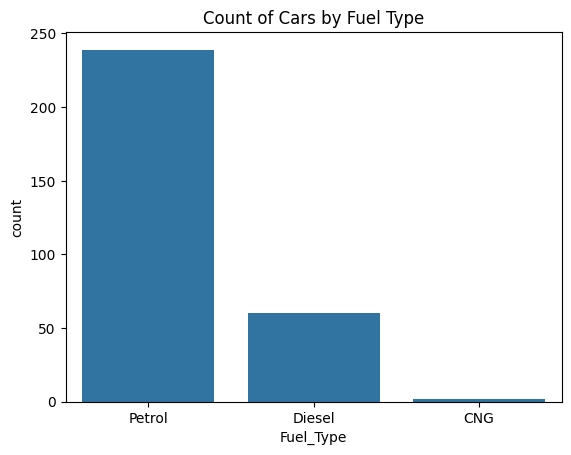

In [14]:
# Bar Chart for Fuel_Type
sns.countplot(data=df, x='Fuel_Type')
plt.title('Count of Cars by Fuel Type')
plt.show()

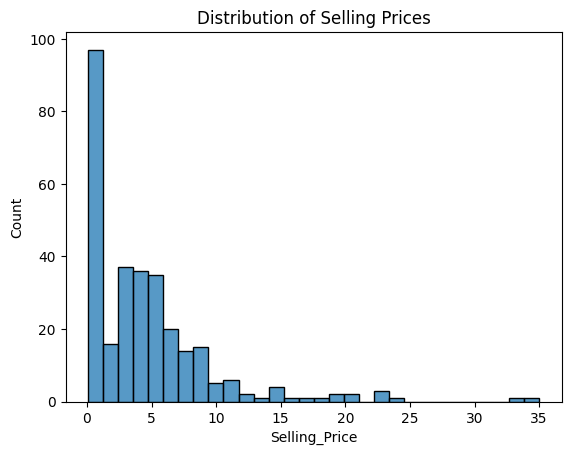

In [15]:
# Histogram for Selling_Price
sns.histplot(df['Selling_Price'], bins=30)
plt.title('Distribution of Selling Prices')
plt.show()

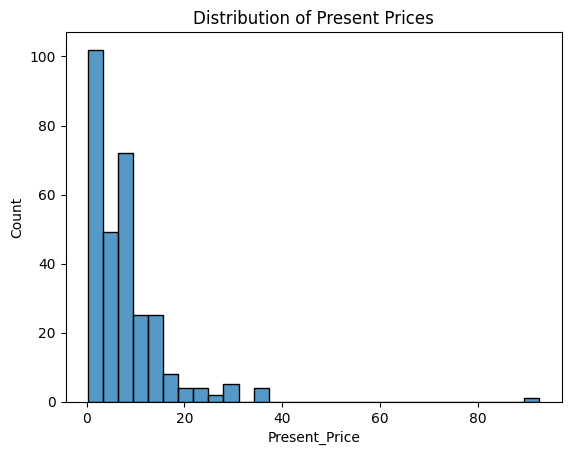

In [36]:
# Histogram for Present_Price
sns.histplot(df['Present_Price'], bins=30)
plt.title('Distribution of Present Prices')
plt.show()

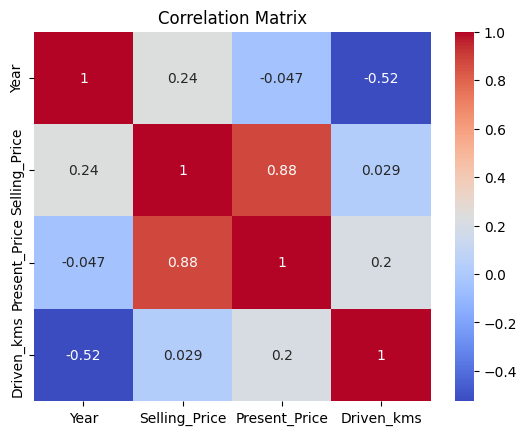

In [28]:
corr = df[['Year', 'Selling_Price', 'Present_Price', 'Driven_kms']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

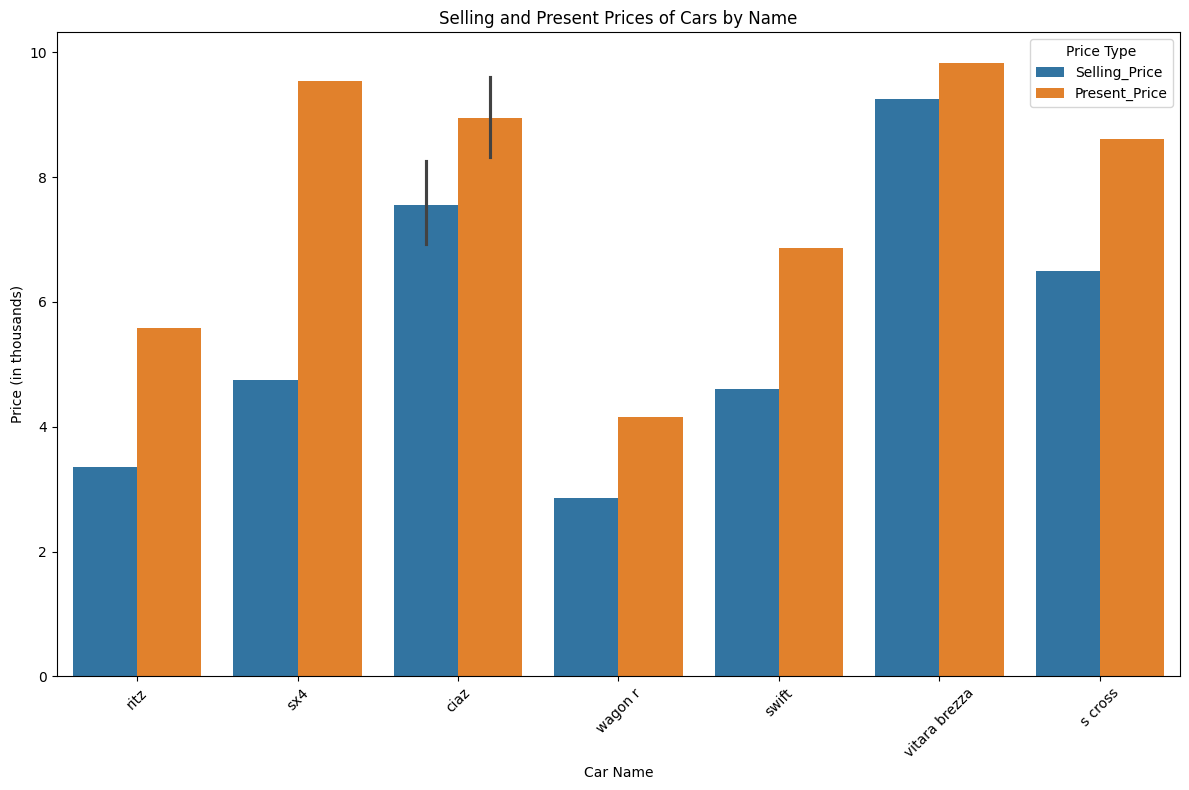

In [35]:
car_prices = df[['Car_Name', 'Selling_Price', 'Present_Price']].head(10)
melted_prices = car_prices.melt(id_vars='Car_Name', var_name='Price_Type', value_name='Price')
plt.figure(figsize=(12, 8))
sns.barplot(data=melted_prices, x='Car_Name', y='Price', hue='Price_Type')
plt.xticks(rotation=45)
plt.xlabel('Car Name')
plt.ylabel('Price (in thousands)')
plt.title('Selling and Present Prices of Cars by Name')
plt.legend(title='Price Type')
plt.tight_layout()
plt.show()

#**Training Model**

In [38]:
# Selecting features and target variable
X = df[['Fuel_Type', 'Transmission', 'Selling_type', 'Driven_kms']]
y = df['Selling_Price']

In [82]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Preprocessing categorical variables to numeric data suitable for model learning purpose
categorical_features = ['Fuel_Type', 'Transmission', 'Selling_type']
preprocessor = ColumnTransformer(
    transformers=[('features col', OneHotEncoder(), categorical_features)],
    remainder='passthrough'
)

In [84]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

In [85]:
# Training the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('features col',
                                                  OneHotEncoder(),
                                                  ['Fuel_Type', 'Transmission',
                                                   'Selling_type'])])),
                ('regressor', LinearRegression())])

In [86]:
# Predicting on the test set
y_pred = pipeline.predict(X_test)

In [87]:
#comparing actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df)

     Actual  Predicted
177    0.35   5.450838
289   10.11   4.971881
228    4.95   9.553170
198    0.15   0.317748
60     6.95   4.538686
..      ...        ...
234    5.50   5.068727
296    9.50   9.941450
281    2.10   4.382624
285    7.40   9.879887
182    0.30   0.392383

[61 rows x 2 columns]


In [88]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 10.42


In [89]:
new_data = pd.DataFrame({
    'Fuel_Type': ['Petrol'],
    'Transmission': ['Manual'],
    'Selling_type': ['Dealer'],
    'Driven_kms': [50000]
})

predicted_price = pipeline.predict(new_data)
print(f'Predicted Selling Price: {predicted_price}')

Predicted Selling Price: [4.38943091]


#**Summary**